In [ ]:
# kaggle data 
# https://www.kaggle.com/competitions/digit-recognizer/data

# !pip install tensorflow

In [ ]:


# Digit Recognizer
# colab for running gpu faster than my own pc cpu. 
# https://colab.research.google.com/drive/1MNw7Hk9tShW71wEQoIUXTroDVfjSG_CA#scrollTo=OnuXoDsthita

# view the monitoring visulaization results in wandb
# https://wandb.ai/moneerzaki-american-university-in-cairo/mnist_cnn_classification/sweeps/g2jk9mo9?nw=nwusermoneerzaki
# https://wandb.ai/moneerzaki-american-university-in-cairo/mnist_cnn_classification/sweeps/e27zzua3?nw=nwusermoneerzaki
# https://wandb.ai/moneerzaki-american-university-in-cairo/mnist_cnn_classification/sweeps/v5cpy7l4?nw=nwusermoneerzaki
# https://wandb.ai/moneerzaki-american-university-in-cairo/mnist_cnn_classification/sweeps/9icqqqk7?nw=nwusermoneerzaki



In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

from tensorflow.keras import layers, models
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall


# from tensorflow.keras.datasets import mnist

In [2]:
pre = pd.read_csv("./digit-recognizer/train.csv")
# print(pre.head(3))
# df.describe()
print(pre.shape)

(42000, 785)


# 1 Data Cleaning

No data cleaning is needed

# 2 Data Preparation

1. pixels normalization 
2. labels hot-encoding 

In [3]:
# Separate the features and labels

# Define the features and target variable
x = pre.drop('label', axis=1)  # Features
y = pre['label']               # Target variable

# Step 1: Split the data into 90% training and 10% temporary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


# Check the shape of the data
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
# y.unique()

# Print unique values of y
# Print unique values of y
unique_labels = np.unique(y)
print("Unique values in y (labels):", unique_labels)

Shape of X_train: (37800, 784)
Shape of y_train: (37800,)
Shape of X_test: (4200, 784)
Shape of y_test: (4200,)
Unique values in y (labels): [0 1 2 3 4 5 6 7 8 9]


1. pixels normalization 

In [4]:

# Normalize the pixel values
x_train_norm= x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0
# print (X) 
print(x_train_norm.shape, '\n', x_test_norm.shape)


(37800, 784) 
 (4200, 784)


2. label hot-encoding 

In [5]:
# One-hot encode the label column

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Print the shape of the one-hot encoded array
print("Shape of one-hot encoded y:", y_train_one_hot.shape)
print("Shape of one-hot encoded y:", y_test_one_hot.shape)

Shape of one-hot encoded y: (37800, 10)
Shape of one-hot encoded y: (4200, 10)


# 3 Building a neural network 
using tensorflow, keras 

In [6]:
# Convert DataFrame to NumPy arrays
x_train = x_train_norm.to_numpy()  # Replace `x_train_df` with your DataFrame
x_test = x_test_norm.to_numpy()    # Replace `x_test_df` with your DataFrame

# Normalize the pixel values
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Reshape X if needed (to match 28x28 shape)
x_train_norm = x_train_norm.reshape(-1, 28, 28) # in torch premute.
x_test_norm = x_test_norm.reshape(-1, 28, 28)

# One-hot encode the label column
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Initialize the model
model = models.Sequential()

# Input layer and hidden layers
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten 28x28 images to 1D
model.add(layers.Dense(128, activation='relu'))  # First hidden layer
model.add(layers.Dense(64, activation='relu'))   # Second hidden layer

# Output layer (10 neurons for 10 classes: digits 0-9)
model.add(layers.Dense(10, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam',               # Optimizer
              loss='categorical_crossentropy', # Loss function for multiclass classification
              metrics=['accuracy', 'Precision', 'Recall'])  # Metrics to track

# Fit the model
model.fit(x_train_norm, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)


# Predict the labels for the test set
y_pred = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels (0-9)
y_true = np.argmax(y_test_one_hot, axis=1)  # Convert one-hot encoded test labels to class labels

# Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

c:\Users\monee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - Precision: 0.7912 - Recall: 0.2121 - accuracy: 0.5385 - loss: 1.5801 - val_Precision: 0.9112 - val_Recall: 0.7709 - val_accuracy: 0.8439 - val_loss: 0.5394
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9059 - Recall: 0.7961 - accuracy: 0.8541 - loss: 0.5034 - val_Precision: 0.9179 - val_Recall: 0.8553 - val_accuracy: 0.8876 - val_loss: 0.4105
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9137 - Recall: 0.8523 - accuracy: 0.8833 - loss: 0.4053 - val_Precision: 0.9170 - val_Recall: 0.8714 - val_accuracy: 0.8929 - val_loss: 0.3781
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Precision: 0.9221 - Recall: 0.8751 - accuracy: 0.8974 - loss: 0.3517 - val_Precision: 0.9287 - val_Recall: 0.8923 - val_accuracy: 0.9087 - val_loss: 0.3351
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Precision: 0.9267 - Recall: 0.8858 - accuracy: 0.9052 - loss: 0.3247 - val_Precision: 0.9350 - v

CNN with Weights and Biases monitoring feature. 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback


wandb.init(project="mnist_cnn_classification")
wandb.log({"metric": 0.5})  # Log a sample metric

# wandb.init(project="mnist_cnn_classification", entity="moneerzaki")

x_train_reshaped = x_train_norm.values.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.values.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train_reshaped.shape)
print("Test data shape:", x_test_reshaped.shape)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# history = model.fit(
#     x_train_reshaped, y_train_one_hot,
#     epochs=10,  # You can adjust this
#     batch_size=32,
#     validation_data=(x_test_reshaped, y_test_one_hot),
#     callbacks=[WandbCallback()]  # W&B callback to log metrics and model performance
# )

history = model.fit(x_train_norm, y_train_one_hot, 
          validation_data=(x_test_norm, y_test_one_hot),
          epochs=10,
          batch_size=32,
          callbacks=[WandbCallback()])




ModuleNotFoundError: No module named 'wandb.keras'

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import wandb

# Initialize W&B
wandb.init(project="trial", entity="moneerzaki")

# Reshape the training and test data
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train_reshaped.shape)
print("Test data shape:", x_test_reshaped.shape)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without the W&B callback
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    history = model.fit(x_train_reshaped, y_train_one_hot,
                        validation_data=(x_test_reshaped, y_test_one_hot),
                        epochs=1,  # Train for one epoch at a time
                        batch_size=32)
    
    # Log metrics manually
    wandb.log({
        "epoch": epoch + 1,
        "loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "accuracy": history.history['accuracy'][0],
        "val_accuracy": history.history['val_accuracy'][0]
    })

# After training, you can finish the W&B run
wandb.finish()


CommError: Run initialization has timed out after 90.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

Training data shape: (37800, 28, 28, 1)
Test data shape: (4200, 28, 28, 1)


c:\Users\monee\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 44:31 2s/step - accuracy: 0.0312 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0521 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0615 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0688 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0745 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0780 - loss: 2.3030 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0803 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0829 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0850 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0864 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0874 - loss: 2.303 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0879 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0885 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0891 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc

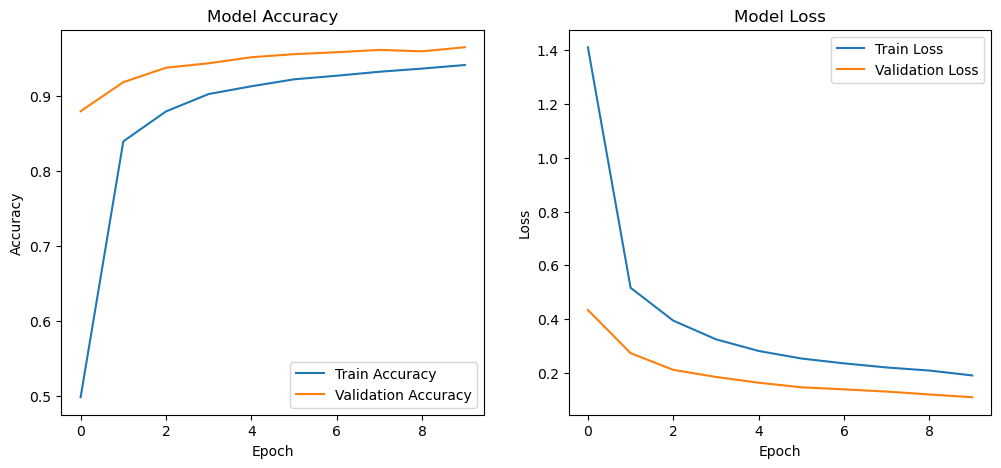

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9688 - loss: 0.086 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.149 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9703 - loss: 0.13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9692 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9682 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9672 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9668 - loss: 0.12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9667 - loss: 0.1212
Test Loss: 0.1093, Test Accuracy: 0.9655


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have your MNIST dataset loaded and preprocessed
# x_train_norm, x_test_norm, y_train, y_test should be defined

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Reshape the training and test data
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train_reshaped.shape)
print("Test data shape:", x_test_reshaped.shape)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
num_epochs = 10
history = model.fit(x_train_reshaped, y_train_one_hot,
                    validation_data=(x_test_reshaped, y_test_one_hot),
                    epochs=num_epochs,  # Train for all epochs at once
                    batch_size=32)

# Plot training and validation accuracy and loss
def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

# Call the plotting function
plot_metrics(history)

# After training, you can evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import wandb
import joblib

# Load and preprocess your MNIST dataset
# Replace this with your actual dataset loading code
# x_train_norm, x_test_norm, y_train, y_test should be defined

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Reshape the training and test data
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train_reshaped.shape)
print("Test data shape:", x_test_reshaped.shape)

# Define the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

# Training function
def train_model():
    # Initialize WandB
    wandb.init()  # Add this line to initialize WandB
    model = create_model()
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Get number of epochs and batch size from WandB config
    num_epochs = wandb.config.num_epochs
    batch_size = wandb.config.batch_size

    # Train the model and store the history
    history = model.fit(x_train_reshaped, y_train_one_hot,
                        validation_data=(x_test_reshaped, y_test_one_hot),
                        epochs=num_epochs,
                        batch_size=batch_size)

    # Log metrics to W&B
    wandb.log({
        'final_train_accuracy': history.history['accuracy'][-1],
        'final_val_accuracy': history.history['val_accuracy'][-1],
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1]
    })

    # Save the model
    model_path = 'mnist_cnn_model.h5'
    model.save(model_path)
    wandb.save(model_path)

# Sweep configuration
sweep_config = {
    'method': 'random',
    'metric': {'name': 'final_val_accuracy', 'goal': 'maximize'},
    'parameters': {
        'num_epochs': {'values': [5, 10, 15, 20]},
        'batch_size': {'values': [32, 64, 128]}
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep=sweep_config, project='mnist_cnn_classification')

# Use the sweep to train the model
wandb.agent(sweep_id, function=train_model, count=20)


Training data shape: (37800, 28, 28, 1)
Test data shape: (4200, 28, 28, 1)
Create sweep with ID: 6vuam5zb
Sweep URL: https://wandb.ai/moneerzaki-american-university-in-cairo/mnist_cnn_classification/sweeps/6vuam5zb


wandb: Agent Starting Run: jjgvl993 with config:
wandb: 	batch_size: 128
wandb: 	num_epochs: 20


Epoch 1/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 10:35 2s/step - accuracy: 0.0547 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0825 - loss: 2.3024 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0871 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0891 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0901 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.0914 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0922 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0930 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0934 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0938 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0940 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.0942 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0944 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0948 - loss: 2.302 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accura

final_train_accuracy,▁
final_train_loss,▁
final_val_accuracy,▁
final_val_loss,▁
final_train_accuracy,0.94484
final_train_loss,0.18194
final_val_accuracy,0.96429
final_val_loss,0.11192


wandb: ERROR Run jjgvl993 errored:
wandb: ERROR Traceback (most recent call last):
wandb: ERROR   File "c:\Users\monee\anaconda3\Lib\site-packages\wandb\agents\pyagent.py", line 306, in _run_job
wandb: ERROR     self._function()
wandb: ERROR   File "C:\Users\monee\AppData\Local\Temp\ipykernel_16856\3711191090.py", line 68, in train_model
wandb: ERROR     wandb.save(model_path)
wandb: ERROR   File "c:\Users\monee\anaconda3\Lib\site-packages\wandb\sdk\wandb_run.py", line 403, in wrapper_fn
wandb: ERROR     return func(self, *args, **kwargs)
wandb: ERROR            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "c:\Users\monee\anaconda3\Lib\site-packages\wandb\sdk\wandb_run.py", line 393, in wrapper
wandb: ERROR     return func(self, *args, **kwargs)
wandb: ERROR            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
wandb: ERROR   File "c:\Users\monee\anaconda3\Lib\site-packages\wandb\sdk\wandb_run.py", line 2032, in save
wandb: ERROR     return self._save(
wandb: ERROR            ^^^^^^^^^^^
wandb: ER

Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 59:29 6s/step - accuracy: 0.0781 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.0778 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.0863 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.0895 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.0916 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.0938 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.0952 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.0956 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.0963 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.0967 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.0972 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.0984 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.0993 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.1003 - loss: 2.30 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accura